In [63]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [64]:
df = pd.read_csv('final_df.csv')
df = df.drop(columns = ['Unnamed: 0'])
# df = df[df['year'] >= 1960]  
# df['worlwide_gross_income']=df['worlwide_gross_income'].str.replace("$",'').astype(float)
# df = df.sort_values(by=['year'])
df

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
0,Psycho,1960,USA,English,109,"Horror, Mystery, Thriller",Alfred Hitchcock,Shamley Productions,A Phoenix secretary embezzles forty thousand d...,$ 806947,...,USA,NaN,NaN,806947.0,Anthony Perkins,D,Vera Miles,D,John Gavin,D
1,Spartacus,1960,USA,English,197,"Adventure, Biography, Drama",Stanley Kubrick,Bryna Productions,The slave Spartacus leads a violent revolt aga...,$ 12000000,...,USA,NaN,NaN,12000000.0,Kirk Douglas,D,Laurence Olivier,D,Jean Simmons,D
2,Swiss Family Robinson,1960,USA,English,126,"Adventure, Family",Ken Annakin,Walt Disney Productions,A Swiss family must survive being shipwrecked ...,$ 5000000,...,USA,NaN,NaN,5000000.0,John Mills,D,Dorothy McGuire,D,James MacArthur,D
3,One Hundred and One Dalmatians,1961,USA,English,79,"Animation, Adventure, Comedy","Clyde Geronimi, Hamilton Luske",Walt Disney Productions,When a litter of Dalmatian puppies are abducte...,$ 4000000,...,USA,NaN,NaN,4000000.0,Rod Taylor,D,J. Pat O'Malley,D,Betty Lou Gerson,D
4,Une femme est une femme,1961,"France, Italy",French,85,"Comedy, Drama, Romance",Jean-Luc Godard,Euro International Film (EIA),A French striptease artist is desperate to bec...,$ 160000,...,France,Italy,NaN,160000.0,Jean-Claude Brialy,D,Anna Karina,D,Jean-Paul Belmondo,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,Captive State,2019,USA,English,109,"Drama, Sci-Fi, Thriller",Rupert Wyatt,DreamWorks,Set in a Chicago neighborhood nearly a decade ...,$ 25000000,...,USA,NaN,NaN,25000000.0,John Goodman,A,Ashton Sanders,D,Jonathan Majors,D
4144,The Angry Birds Movie 2,2019,"Finland, USA",English,97,"Animation, Adventure, Comedy","Thurop Van Orman, John Rice",Sony Pictures Animation,The flightless birds and scheming green pigs t...,$ 65000000,...,Finland,USA,NaN,65000000.0,Jason Sudeikis,B,Josh Gad,A,Leslie Jones,D
4145,The Lion King,2019,USA,English,118,"Animation, Adventure, Drama",Jon Favreau,Fairview Entertainment,"After the murder of his father, a young lion p...",$ 260000000,...,USA,NaN,NaN,260000000.0,Chiwetel Ejiofor,A,John Oliver,B,James Earl Jones,B
4146,The Kitchen,2019,USA,English,102,"Action, Crime, Drama",Andrea Berloff,BRON Studios,The wives of New York gangsters in Hell's Kitc...,$ 38000000,...,USA,NaN,NaN,38000000.0,Melissa McCarthy,B,Tiffany Haddish,C,Elisabeth Moss,D


In [65]:
df2 = df.dropna()
df2

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
13,Cleopatra,1963,"Switzerland, UK, USA",English,192,"Biography, Drama, History",Joseph L. Mankiewicz,Twentieth Century Fox,Queen Cleopatra VII of Egypt experiences both ...,$ 44000000,...,Switzerland,UK,USA,44000000.0,Elizabeth Taylor,D,Richard Burton,D,Rex Harrison,D
25,Doctor Zhivago,1965,"USA, Italy, UK, Liechtenstein","English, Russian, French",197,"Drama, Romance, War",David Lean,Metro-Goldwyn-Mayer (MGM),"The life of a Russian physician and poet who, ...",$ 11000000,...,USA,Italy,UK,11000000.0,Omar Sharif,D,Julie Christie,D,Geraldine Chaplin,D
56,Willy Wonka & the Chocolate Factory,1971,"USA, East Germany, West Germany","English, French, German, Italian",100,"Family, Fantasy, Musical",Mel Stuart,Wolper Pictures Ltd.,A poor but hopeful boy seeks one of the five c...,$ 3000000,...,USA,East Germany,West Germany,3000000.0,Gene Wilder,D,Jack Albertson,D,Peter Ostrum,D
126,Superman,1978,"USA, UK, Canada, Switzerland",English,143,"Action, Adventure, Drama",Richard Donner,Dovemead Films,An alien orphan is sent from his dying planet ...,$ 55000000,...,USA,UK,Canada,55000000.0,Marlon Brando,D,Gene Hackman,C,Christopher Reeve,D
162,Superman II,1980,"USA, UK, Canada","English, French, Russian",127,"Action, Adventure, Sci-Fi","Richard Lester, Richard Donner",Dovemead Films,Superman agrees to sacrifice his powers to sta...,$ 54000000,...,USA,UK,Canada,54000000.0,Gene Hackman,C,Christopher Reeve,D,Ned Beatty,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,Godzilla: King of the Monsters,2019,"Japan, Canada, USA","English, Japanese, Chinese, Spanish",132,"Action, Adventure, Fantasy",Michael Dougherty,Warner Bros.,The crypto-zoological agency Monarch faces off...,$ 170000000,...,Japan,Canada,USA,170000000.0,Kyle Chandler,D,Vera Farmiga,C,Millie Bobby Brown,D
4110,Dumbo,2019,"USA, UK, Australia, Canada","English, French",112,"Adventure, Family, Fantasy",Tim Burton,Walt Disney Pictures,"A young elephant, whose oversized ears enable ...",$ 170000000,...,USA,UK,Australia,170000000.0,Colin Farrell,A,Michael Keaton,A,Danny DeVito,B
4121,Terminator: Dark Fate,2019,"USA, Spain, Hungary","English, Spanish",128,"Action, Adventure, Sci-Fi",Tim Miller,Paramount Pictures,Sarah Connor and a hybrid cyborg human must pr...,$ 185000000,...,USA,Spain,Hungary,185000000.0,Linda Hamilton,D,Arnold Schwarzenegger,A,Mackenzie Davis,D
4139,Cold Pursuit,2019,"UK, Norway, Canada, USA, France, Germany","English, Vietnamese, Shoshoni",119,"Action, Crime, Drama",Hans Petter Moland,StudioCanal,A grieving snowplow driver seeks out revenge a...,$ 60000000,...,UK,Norway,Canada,60000000.0,Liam Neeson,A,Laura Dern,D,Micheál Richardson,D


In [66]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [67]:
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
y = df2['overall_eval']

In [68]:
# X = df[['budget_USD', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']].apply(LabelEncoder().fit_transform)
# y = df['IMDB_rating']

In [69]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 1, stratify =y)

In [70]:
# from sklearn.model_selection import train_test_split 
# # y = df2[['good','bad']].values.reshape(-1,1)
# # y = df2['sentiment'].values.reshape(-1,1)
# y = df2['sentiment'].values.ravel()
# # target_names = df2[['good', 'bad']]
# # y = df2(np.ravel(df2['sentiment'])
# # y = df2['sentiment'].apply(LabelEncoder().fit_transform).reshape(-1,1)
# # X = df[['budget_USD','genre_1','Ranking_1']].apply(LabelEncoder().fit_transform)
# X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','production_company']].apply(LabelEncoder().fit_transform)
# print(X.shape, y.shape)

In [71]:
# df2['sentiment'] = labelencoder.fit_transform(df2['sentiment'])
# newdf=pd.DataFrame(df2['sentiment'])
# newdf


#ohe = OneHotEncoder()
#ohedf = ohe.fit_transform(df2['sentiment'].values.ravel().reshape(-1,1)).toarray()
#ohedf

In [72]:
# !pip install keras

In [73]:
# from keras.utils import to_categorical

In [74]:
# X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 1, stratify =y)

In [75]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
from sklearn.svm import SVC
model2 = SVC(kernel = "linear")
model2.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.9752066115702479
Testing Data Score: 0.9344262295081968


In [78]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[1,5,10],
             "gamma": [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model2,param_grid,verbose = 3)

In [79]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.918, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.973, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.986, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.944, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.931, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.918, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. C=10, gamma=0.0001, score=0.986, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.944, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.958, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.945, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.973, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.986, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.944, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [80]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.9613774733637748


In [58]:
# Classification Report
target_names = ['bad', 'good']
from sklearn.metrics import classification_report
predictions = model2.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        57
        good       0.53      1.00      0.70        65

    accuracy                           0.53       122
   macro avg       0.27      0.50      0.35       122
weighted avg       0.28      0.53      0.37       122



/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


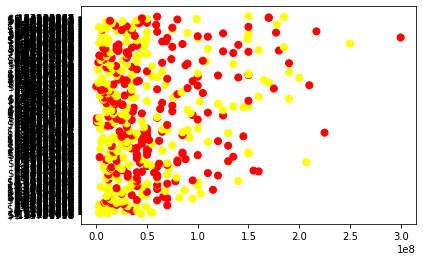

In [62]:
# X=df2[['budget_USD','listing_1']].iloc[:,0:2]

y=df2['overall_eval']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

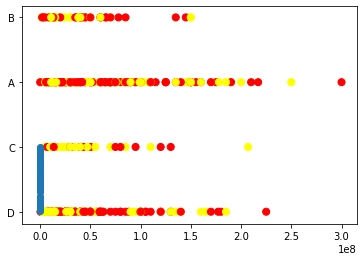

In [60]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model2.support_vectors_[:,0],model2.support_vectors_[:,1])

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


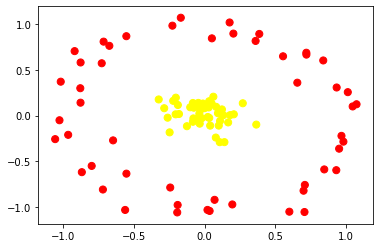

In [38]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')